In [32]:
import nltk
import pandas as pd
import polars as pl
import seaborn as sns
sns.set_theme(style='whitegrid')
from collections import Counter
from nltk.corpus import stopwords

from matplotlib import pyplot as plt

%config InlineBackend.figure_format='retina'

In [33]:
df = pl.read_csv("claims.csv")
pl.Config.set_tbl_rows(-1)
pl.Config.set_fmt_str_lengths(1000)

# df = df.with_columns(Claim = pl.col("Claim").str.to_lowercase())

df.head()

Detail level,Claim,Soft/hard,Color,Annotator
str,str,str,str,str
"""High""","""Excited to apply for position""","""Soft""","""Orange""","""aksv"""
"""High""","""Studying Data Science at the IT University""","""Hard""","""Green""","""aksv"""
"""High""","""Eager to apply analytical and technical skills""","""Soft""","""Orange""","""aksv"""
"""High""","""1.5 years as student data analyst in the medical industry""","""Hard""","""Green""","""aksv"""
"""High""","""Strong skills in Python""","""Hard""","""Green""","""aksv"""


In [34]:
color_detail_level = (df.group_by("Color", "Detail level")
                      .agg(pl.len())
                      .sort("Color", "Detail level"))
color_detail_level

Color,Detail level,len
str,str,u32
"""Green""","""High""",54
"""Green""","""Low""",14
"""Green""","""Medium""",23
"""Green""","""None""",1
"""Orange""","""High""",36
"""Orange""","""Low""",60
"""Orange""","""Medium""",46
"""Orange""","""None""",38
"""Red""","""High""",2


# Distribution of claim color per detail level

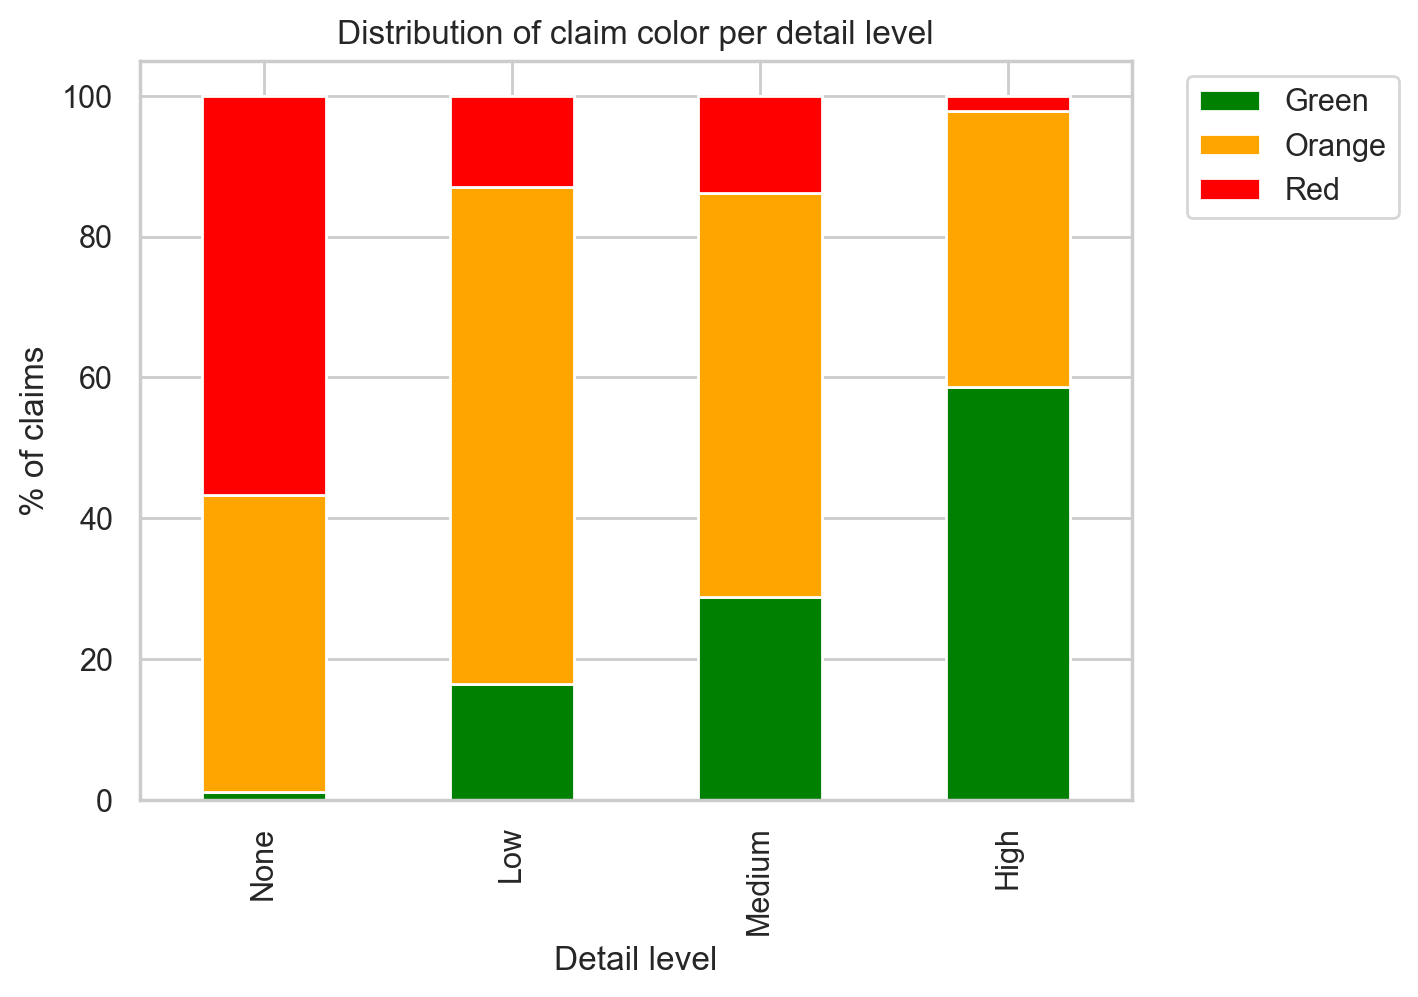

In [35]:
pandas_df = color_detail_level.to_pandas()
pivot_df = pandas_df.pivot(index='Detail level',
                    columns='Color',
                    values='len')

pivot_df = pivot_df.loc[["None", "Low", "Medium", "High"]]
palette = {x:x.lower() for x in color_detail_level["Color"]}

pivot_df_percentage = pivot_df.div(pivot_df.sum(axis=1), axis=0) * 100

pivot_df_percentage.plot.bar(stacked=True,
                  grid=True,
                  color=palette
                  )

plt.legend(bbox_to_anchor=(1.04, 1), 
           loc='upper left')


plt.ylabel("% of claims")
plt.title("Distribution of claim color per detail level")

plt.show()

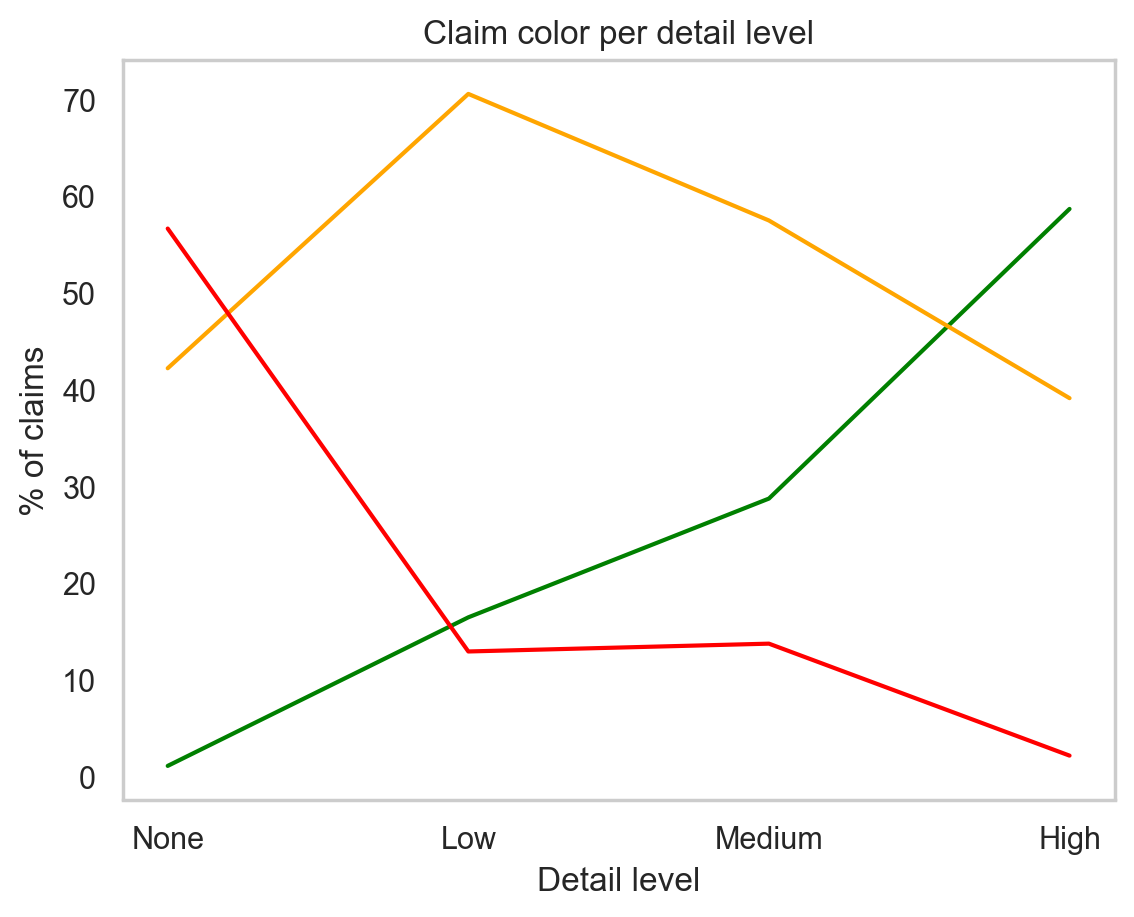

In [43]:
pivot_df_percentage.plot.line(
    color=palette
)

plt.legend('',frameon=False)
plt.ylabel("% of claims")
plt.title("Claim color per detail level")
plt.grid()
plt.show()

### Most common claims for each color

In [37]:
(df
 .group_by("Color", "Claim")
 .agg(pl.len())
 .sort("Color", "len" , descending=True)
 .filter(pl.col("len") >= 3))

Color,Claim,len
str,str,u32
"""Red""","""Experience with Power BI""",7
"""Red""","""Experience with SQL""",5
"""Red""","""Experience with Python""",5
"""Red""","""Strong skills in SQL""",4
"""Red""","""Strong skills in Python""",4
"""Red""","""Experience with data visualization""",3
"""Orange""","""Welcome opportunity to discuss how my skills align with the role""",10
"""Orange""","""Excited to apply for position""",10
"""Orange""","""Look forward to hearing from you""",6


In [47]:
(df
 .group_by("Color", "Detail level", "Claim")
 .agg(pl.len())
 .sort("Color","Detail level", "len","Claim" , descending=True))

Color,Detail level,Claim,len
str,str,str,u32
"""Red""","""None""","""Experience with Power BI""",4
"""Red""","""None""","""Experience with data visualization""",3
"""Red""","""None""","""Thrive in collaborative environment""",2
"""Red""","""None""","""Strong skills in SQL""",2
"""Red""","""None""","""Strong skills in Python""",2
"""Red""","""None""","""Strong foundation in data analysis""",2
"""Red""","""None""","""Experience with data cleaning""",2
"""Red""","""None""","""Experience with data analysis""",2
"""Red""","""None""","""Experience with SQL""",2
